A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
For the same purpose, the company has collected a data set from the sale of houses in Australia. 
The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularisation in order to predict the actual value of the prospective 
properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

In [1]:
# importing requires libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

In [90]:
# reading data from csv file
data = pd.read_csv('./train.csv')

In [91]:
# getting the number of rows and columns in the data 
data.shape

(1460, 81)

In [92]:
# reading the first 5 rows of data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
# getting the mean, standard deviation and different quartile values for the numerical columns
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [94]:
# getting the type of columns and non-null values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [95]:
# getting the percentage of missing values in the data 
missing_data = (100*data.isna().sum()/ len(data)).reset_index()
missing_data[missing_data[0] > 0]

,index,0
3,LotFrontage,17.739726
6,Alley,93.767123
25,MasVnrType,0.547945
26,MasVnrArea,0.547945
30,BsmtQual,2.534247
31,BsmtCond,2.534247
32,BsmtExposure,2.602740
33,BsmtFinType1,2.534247
35,BsmtFinType2,2.602740
42,Electrical,0.068493


we see there are various columns with missing values.
But there is catch, actually the values are not null if the house doesn't contain garage or alley the value of that column
is marked as NA.
So, we need to replace values in such column with No Basement or No Alley etc 

In [96]:
data['Alley'].fillna('No Alley', inplace=True)
data['MasVnrType'].fillna('No MasVnrType', inplace=True)
data['MasVnrArea'].fillna(0, inplace=True)
data['LotFrontage'].fillna(0, inplace=True)
data['BsmtQual'].fillna('No Basement', inplace=True)
data['BsmtCond'].fillna('No Basement', inplace=True)
data['BsmtExposure'].fillna('No Basement', inplace=True)
data['BsmtFinType1'].fillna('No Basement', inplace=True)
data['BsmtFinType2'].fillna('No Basement', inplace=True)
data['FireplaceQu'].fillna('No Fireplace', inplace=True)
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageFinish'].fillna('No Garage', inplace=True)
data['GarageQual'].fillna('No Garage', inplace=True)
data['GarageCond'].fillna('No Garage', inplace=True)
data['PoolQC'].fillna('No Pool', inplace=True)
data['Fence'].fillna('No Fence', inplace=True)
data['MiscFeature'].fillna('No Features', inplace=True)

In [97]:
# since rows with null values for column Electrical are less than 1% so getting rid of these rows
data = data[~data['Electrical'].isnull()]

In [98]:
# the shape of data after handling the missing values
data.shape

(1459, 81)

In [99]:
# again checking the missing values 
missing_data = (100*data.isna().sum()/ len(data)).reset_index()
missing_data[missing_data[0] > 0]

,index,0
59,GarageYrBlt,5.551748


so there is still one more column we need to deal for missing values.<br>
GarageYrBlt is null because these houses don't have the Garage to handle these rows we are going to convert the <br>
GarageYrBlt column to age i.e. how many years ago the garage was built. <br>
To calculate the value we need to take the difference of current year (2020) - value of column <br>
<br>
There are others columns like YearBuilt, YearRemodAdd, YrSold we are going to perform the same operations

In [100]:
data['GarageYrBlt'] = 2020 - data['GarageYrBlt']
data['YearBuilt'] = 2020-data['YearBuilt']
data['YearRemodAdd'] = 2020-data['YearRemodAdd']
data['YrSold'] = 2020-data['YrSold']

In [101]:
data['GarageYrBlt'].fillna(0, inplace=True)
data['GarageYrBlt'].isna().sum()

0

In [102]:
# lets perform binning on the year columns 
# if age is between 0-10 we now the activity is performed recently 
# else old

def getAgeBins(row):
    if row >=0 and row <=10:
        return 'Recent'
    else:
        return 'Old'

data['GarageYrBlt'] = data['GarageYrBlt'].apply(lambda row: getAgeBins(row))
data['YearBuilt'] = data['YearBuilt'].apply(lambda row: getAgeBins(row))
data['YearRemodAdd'] = data['YearRemodAdd'].apply(lambda row: getAgeBins(row))
data['YrSold'] = data['YrSold'].apply(lambda row: getAgeBins(row))

## lets do some visualization

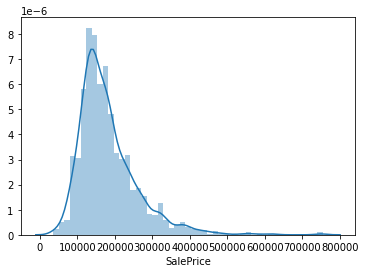

In [103]:
# visualizing price distribution
sns.distplot(data['SalePrice'])

# by looks of the dist plot for the saleprice, the variable is normally distributed

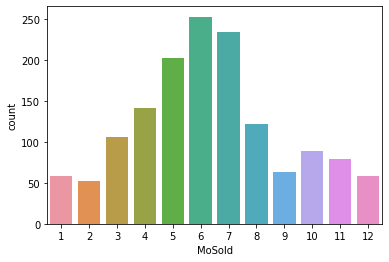

In [104]:
sns.countplot(x='MoSold', data=data)

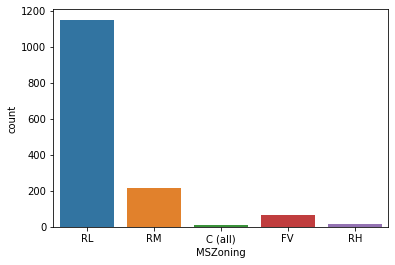

In [105]:
# getting the count of the MSZoning
sns.countplot(data['MSZoning'])

Max number of data is for Residential Low Density with around 1100 as count

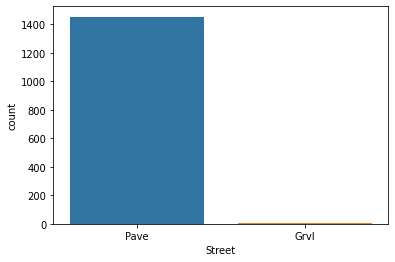

In [106]:
# count of the properties with different Street
sns.countplot(data['Street'])

Most of the houses have Paved street

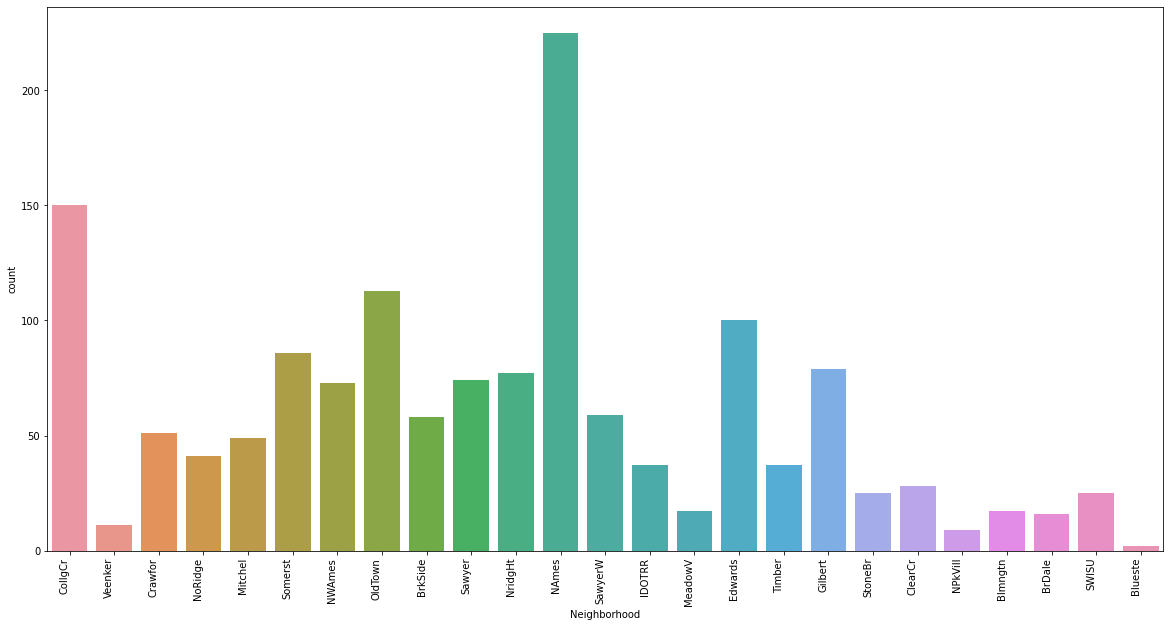

In [107]:
# getting the most neighbourhood 
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Neighborhood", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


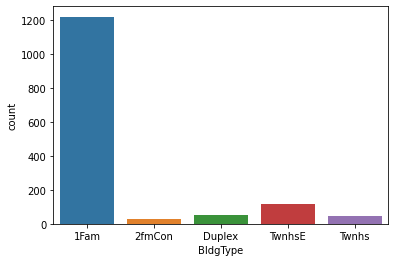

In [108]:
# count of building type
sns.countplot("BldgType", data=data)

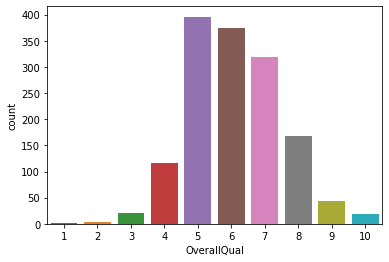

In [109]:
# count of the building OverallQual
sns.countplot("OverallQual", data=data)

house ratings between 5 -7 are more

most of the houses built are 2007

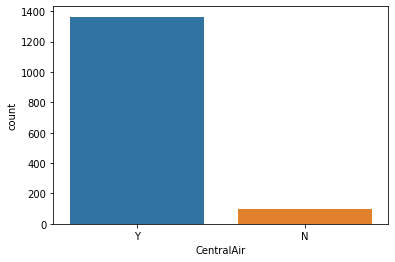

In [110]:
# count of houses with airconditioning
sns.countplot('CentralAir', data=data)

Most of the house have central air conditioning 

### lets visualize the depandent variable price with indepandent variables

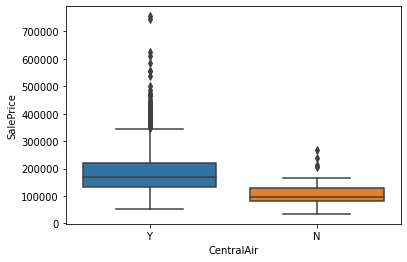

In [111]:
# visualizing the price with central air conditioning
sns.boxplot(x='CentralAir', y='SalePrice', data=data)

the average price of house with no central air conditioning is very less than the houses with central air conditioning

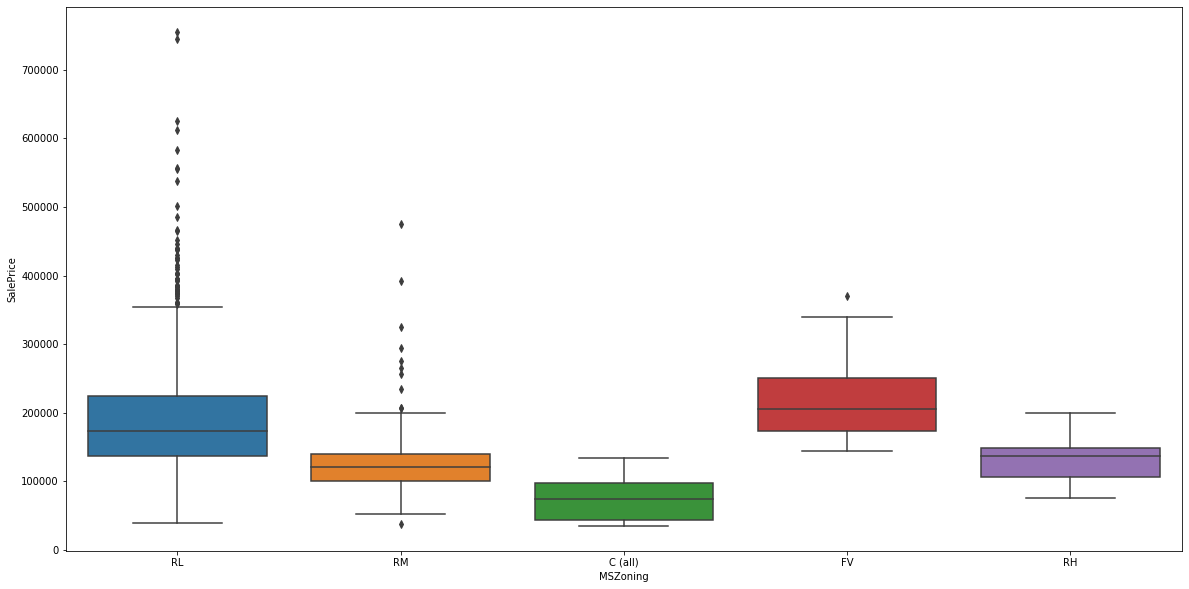

In [112]:
plt.figure(figsize=(20,10))
sns.boxplot(x='MSZoning', y='SalePrice',data=data)
plt.show()

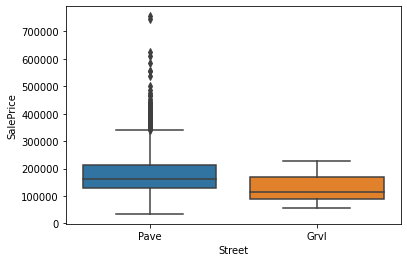

In [113]:
# visualizing saleprice with Street
sns.boxplot(x='Street', y='SalePrice', data=data)

paved street are most costlier than graved stree houses

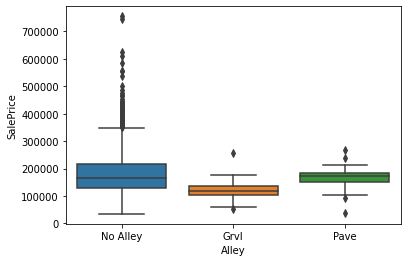

In [114]:
# houses with Alley
sns.boxplot(x='Alley', y='SalePrice',data=data)

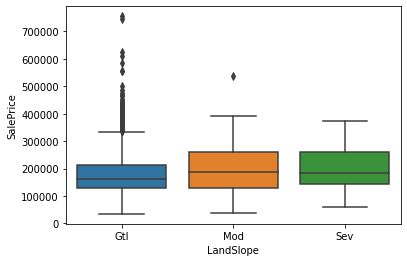

In [115]:
sns.boxplot(x='LandSlope', y='SalePrice',data=data)

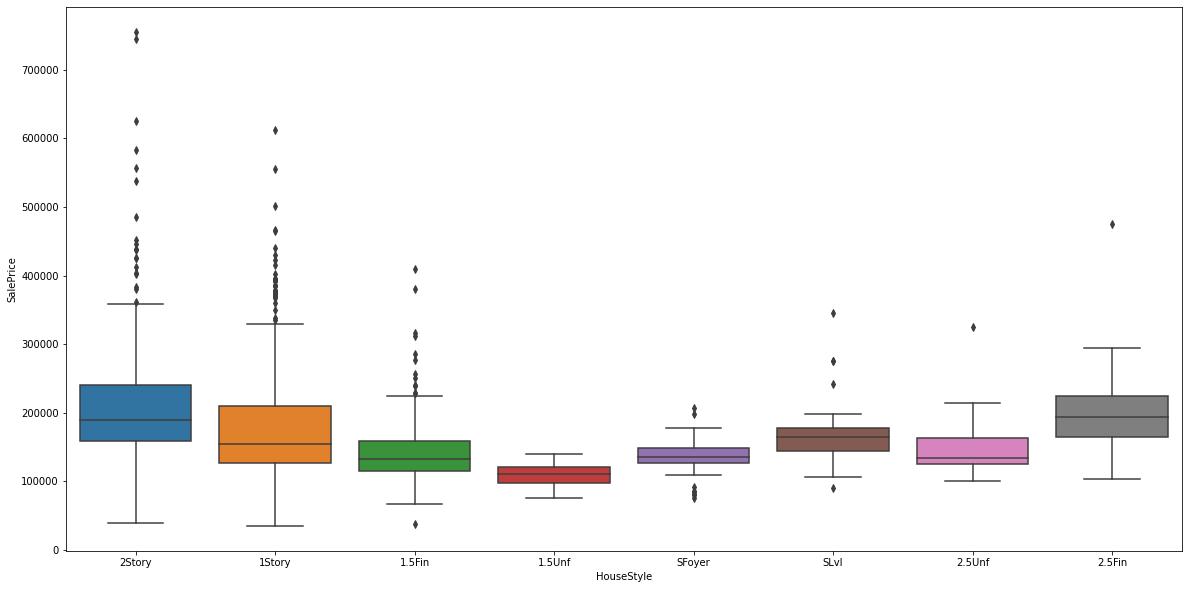

In [116]:
plt.figure(figsize=(20,10))
sns.boxplot(x='HouseStyle', y='SalePrice', data=data)
plt.show()

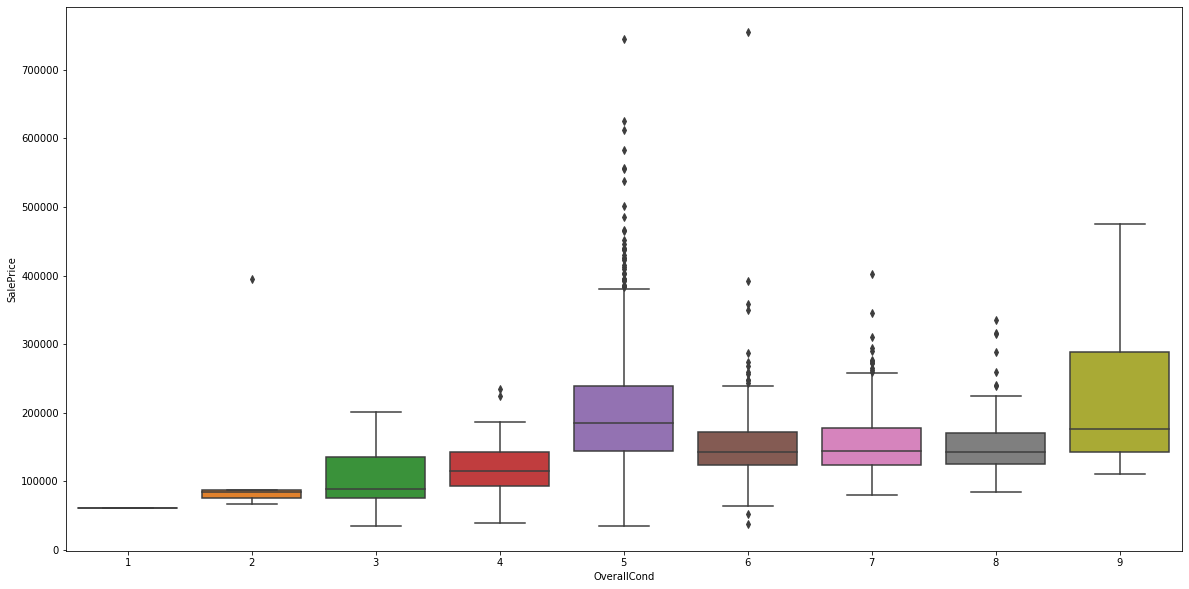

In [117]:
plt.figure(figsize=(20,10))
sns.boxplot(x='OverallCond', y='SalePrice', data=data)
plt.show()

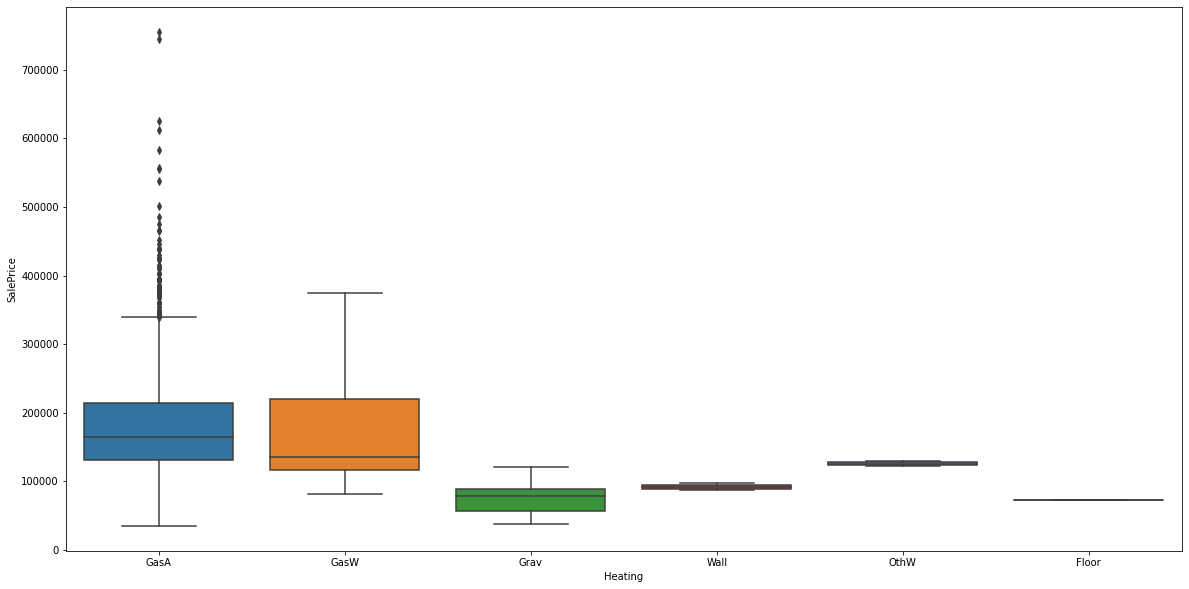

In [118]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Heating', y='SalePrice', data=data)
plt.show()

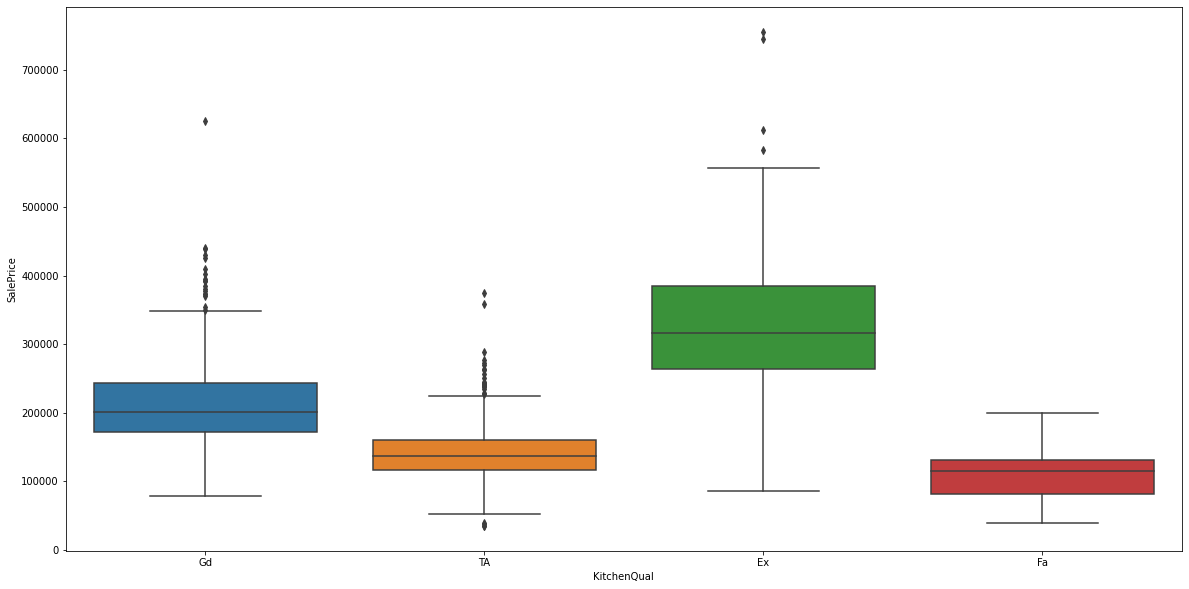

In [119]:
plt.figure(figsize=(20,10))
sns.boxplot(x='KitchenQual', y='SalePrice', data=data)
plt.show()

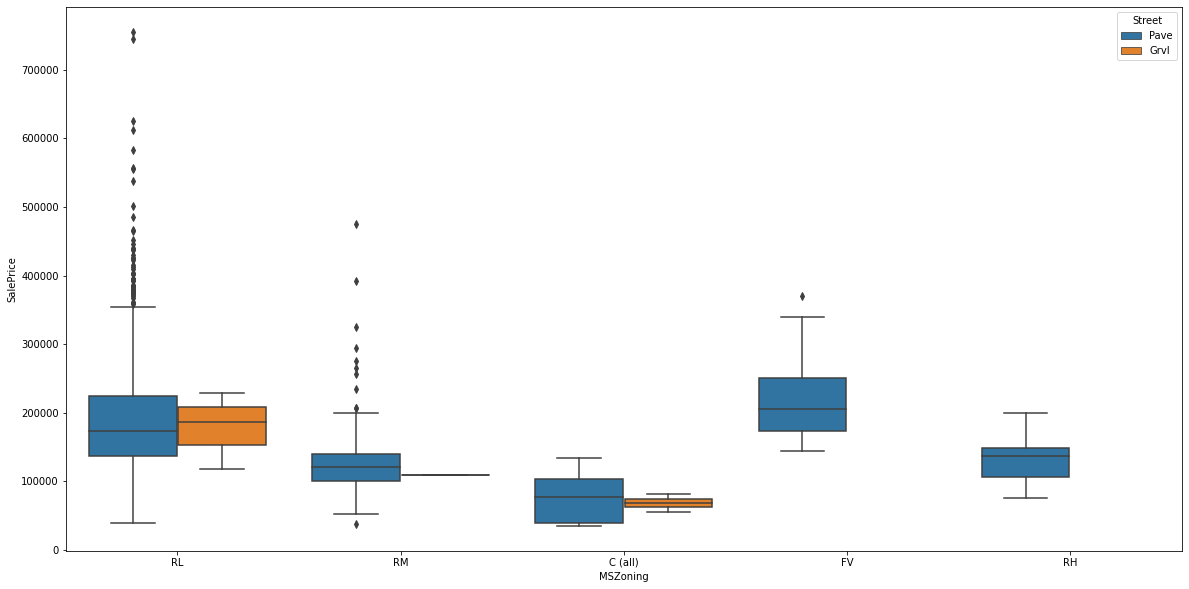

In [120]:
# some more visualizations
plt.figure(figsize=(20,10))
sns.boxplot(x='MSZoning', y='SalePrice', hue='Street', data=data)
plt.show()

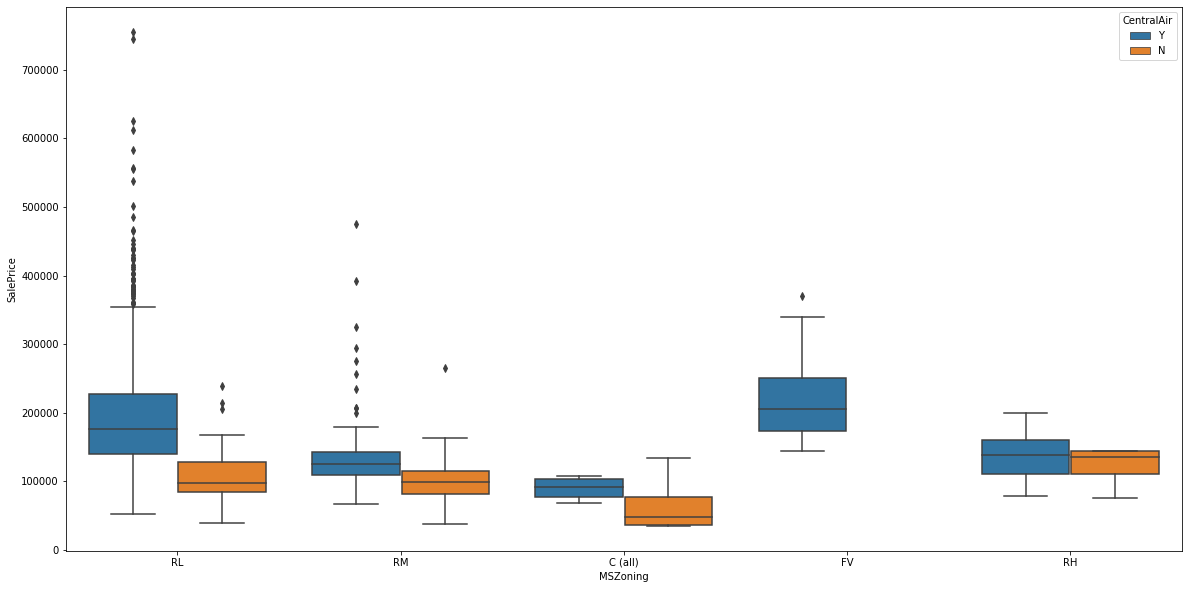

In [121]:
plt.figure(figsize=(20,10))
sns.boxplot(x='MSZoning', y='SalePrice', hue='CentralAir', data=data)
plt.show()

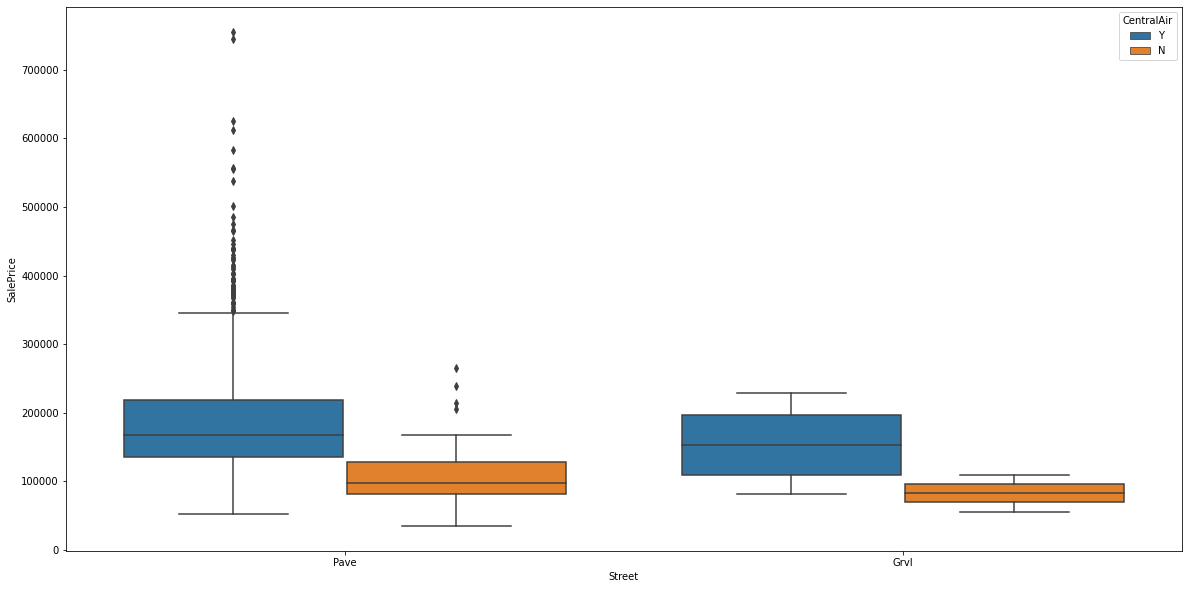

In [122]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Street', y='SalePrice', hue='CentralAir', data=data)
plt.show()

### converting the column to dummies 

In [123]:
data['Street'] = data['Street'].apply(lambda row: 1 if row == "Grvl" else 0)
data['CentralAir'] = data['CentralAir'].apply(lambda row: 1 if row == "N" else 0)
data['GarageYrBlt'] = data['GarageYrBlt'].apply(lambda row: 1 if row == "Recent" else 0)
data['YearBuilt'] = data['YearBuilt'].apply(lambda row: 1 if row == "Recent" else 0)
data['YearRemodAdd'] = data['YearRemodAdd'].apply(lambda row: 1 if row == "Recent" else 0)
data['YrSold'] = data['YrSold'].apply(lambda row: 1 if row == "Recent" else 0)

In [124]:
# converting int columns to categoriacal variables
data['MSSubClass'] = data['MSSubClass'].astype('category')
data['OverallQual'] = data['OverallQual'].astype('category')
data['OverallCond'] = data['OverallCond'].astype('category')

In [125]:
# converting the categorical variables to dummies 
dummy = pd.get_dummies(data[['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
               'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']])

In [126]:
data = pd.concat([data, dummy], axis=1)

In [127]:
data = data.drop(columns=['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
               'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Id'], axis=1)


In [128]:
data.shape

(1459, 333)

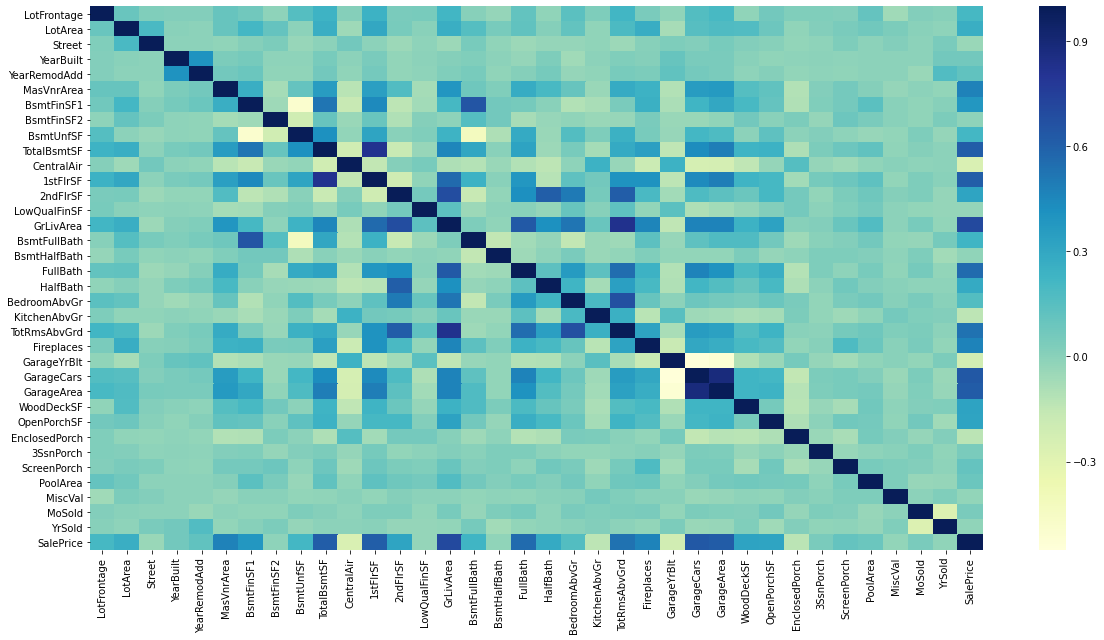

In [129]:
# getting the numeric columns
data_numeric_vars = data.select_dtypes(include=['float64', 'int64'])

# correlation matrix
numeric_cols = data_numeric_vars.columns
cor = data[numeric_cols].corr()
cor

# plotting the heatmap for correlation
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

### splitting the data to train and test

In [130]:
train_data, test_data = train_test_split(data, random_state=100, train_size=0.7, test_size=0.3)

In [131]:
data_numeric_col_names = data_numeric_vars.columns

### scaling the numerical columns

In [132]:
scaler = StandardScaler()

In [133]:
train_data[data_numeric_col_names] = scaler.fit_transform(train_data[data_numeric_col_names])

In [134]:
y_train = train_data['SalePrice']
X_train = train_data.drop(['SalePrice'], axis=1)

### Lasso regression

In [135]:
lasso = Lasso()
folds = 5
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [136]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.206449,0.046326,0.001596,0.000488,0.0001,{'alpha': 0.0001},-0.209439,-0.242542,-0.229859,-0.255096,...,-0.230027,0.017259,2,-0.147682,-0.134495,-0.140049,-0.147468,-0.144156,-0.142770,0.004980
1,0.093352,0.014475,0.001596,0.000489,0.001,{'alpha': 0.001},-0.201744,-0.225066,-0.214948,-0.232949,...,-0.213187,0.015132,1,-0.163940,-0.149912,-0.153981,-0.158375,-0.159963,-0.157234,0.004856
2,0.018254,0.001719,0.001596,0.000489,0.01,{'alpha': 0.01},-0.251913,-0.257333,-0.253918,-0.261253,...,-0.250917,0.010845,3,-0.222697,-0.223754,-0.224410,-0.214802,-0.228904,-0.222913,0.004575
3,0.012965,0.001262,0.001596,0.000489,0.05,{'alpha': 0.05},-0.296195,-0.332627,-0.308771,-0.315055,...,-0.310758,0.012681,4,-0.295224,-0.292646,-0.294225,-0.290529,-0.296672,-0.293859,0.002120
4,0.010971,0.001093,0.001197,0.000398,0.1,{'alpha': 0.1},-0.341029,-0.367942,-0.345654,-0.358240,...,-0.351787,0.009881,5,-0.345658,-0.338541,-0.338721,-0.331993,-0.344765,-0.339936,0.004951


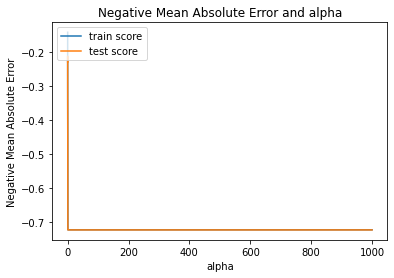

In [137]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Optimal value of alpha is 0

In [138]:
alpha =0

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

array([ 1.55861688e-02,  7.19862206e-02, -1.87632435e-02, -1.87561689e-02,
        4.87802092e-02,  3.89498818e-02,  1.73499103e-01,  5.83875199e-02,
        7.11207705e-02,  4.19436271e-02,  3.81876198e-03,  1.77924478e-01,
        2.94873893e-01, -6.98915467e-03,  4.55526592e-02,  1.78566057e-02,
        5.11272657e-03,  3.28679409e-02, -1.73716582e-03, -1.94339421e-02,
       -6.97019377e-02,  2.64091254e-02,  3.26167705e-02, -1.19517564e-01,
        4.14362773e-02,  6.49454154e-02,  1.45564497e-02,  3.20441299e-03,
        6.49019070e-03,  2.07760818e-02,  1.74561496e-02,  6.44431931e-01,
        2.03860060e-02, -1.96797716e-02, -9.45666826e-03,  5.36992455e-02,
        1.21387258e-02, -8.63606965e-02,  5.11832664e-02, -4.58582817e-02,
        1.04312992e-01, -1.95190977e-02, -4.28372564e-01,  2.41186363e-02,
        2.63303522e-02, -8.04208831e-02,  3.25019662e-02,  2.72759845e-02,
        1.19484379e-01, -3.39664674e-01, -5.59174560e-01,  1.45757528e-01,
        1.21740180e-01,  

In [139]:
y_pred = lasso.predict(X_train)

In [140]:
lasso.score(X_train, y_train)

0.9458634846042352

Score of our model on train data is 94% 

#### getting the top 10 features helful in prediction

In [141]:
lasso_model_param = list(lasso.coef_)
cols = X_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_param)))
lasso_coef.columns = ['feature_name','coef']
lasso_coef.sort_values(by='coef',ascending=False).head(10)

,feature_name,coef
113,Condition2_PosA,1.979898
140,OverallQual_10,1.081515
155,RoofStyle_Shed,1.027484
110,Condition2_Artery,0.758134
31,PoolArea,0.644432
66,Utilities_AllPub,0.589449
158,RoofMatl_Membran,0.567015
117,Condition2_RRNn,0.548767
283,GarageType_No Garage,0.544351
163,RoofMatl_WdShngl,0.506503


### Ridge regression

In [142]:
## Ridge regression
ridge = Ridge()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [143]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011569,0.003433,0.001594,4.876155e-04,0.0001,{'alpha': 0.0001},-0.220078,-0.262193,-0.247262,-0.331496,...,-0.258171,0.039383,26,-0.145965,-0.132631,-0.133583,-0.141850,-0.137578,-0.138322,0.005025
1,0.008976,0.001411,0.001596,4.886361e-04,0.001,{'alpha': 0.001},-0.220097,-0.262057,-0.246215,-0.315015,...,-0.254748,0.033305,25,-0.145979,-0.132638,-0.134378,-0.142364,-0.138214,-0.138715,0.004941
2,0.010173,0.000747,0.001396,4.884027e-04,0.01,{'alpha': 0.01},-0.220386,-0.260792,-0.244948,-0.286205,...,-0.248699,0.023120,24,-0.146130,-0.132725,-0.137011,-0.144244,-0.140715,-0.140165,0.004854
3,0.010974,0.002274,0.001393,4.861571e-04,0.05,{'alpha': 0.05},-0.222397,-0.256127,-0.243767,-0.275026,...,-0.245193,0.018985,23,-0.146868,-0.133368,-0.138165,-0.145255,-0.142234,-0.141178,0.004903
4,0.006583,0.000489,0.000997,3.814697e-07,0.1,{'alpha': 0.1},-0.224404,-0.251635,-0.241883,-0.270064,...,-0.243130,0.016653,22,-0.147802,-0.134621,-0.138839,-0.145868,-0.143383,-0.142102,0.004794


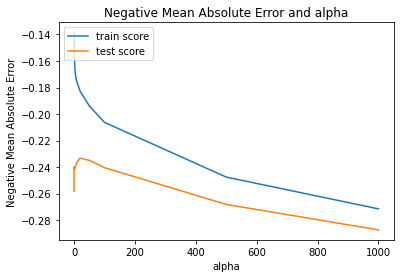

In [144]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [145]:
alpha = 0

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train, y_train) 

lasso.coef_

array([ 1.55861688e-02,  7.19862206e-02, -1.87632435e-02, -1.87561689e-02,
        4.87802092e-02,  3.89498818e-02,  1.73499103e-01,  5.83875199e-02,
        7.11207705e-02,  4.19436271e-02,  3.81876198e-03,  1.77924478e-01,
        2.94873893e-01, -6.98915467e-03,  4.55526592e-02,  1.78566057e-02,
        5.11272657e-03,  3.28679409e-02, -1.73716582e-03, -1.94339421e-02,
       -6.97019377e-02,  2.64091254e-02,  3.26167705e-02, -1.19517564e-01,
        4.14362773e-02,  6.49454154e-02,  1.45564497e-02,  3.20441299e-03,
        6.49019070e-03,  2.07760818e-02,  1.74561496e-02,  6.44431931e-01,
        2.03860060e-02, -1.96797716e-02, -9.45666826e-03,  5.36992455e-02,
        1.21387258e-02, -8.63606965e-02,  5.11832664e-02, -4.58582817e-02,
        1.04312992e-01, -1.95190977e-02, -4.28372564e-01,  2.41186363e-02,
        2.63303522e-02, -8.04208831e-02,  3.25019662e-02,  2.72759845e-02,
        1.19484379e-01, -3.39664674e-01, -5.59174560e-01,  1.45757528e-01,
        1.21740180e-01,  

In [146]:
ridge.score(X_train, y_train)

0.9287166194493841

score of model using ridge is 93%

Getting the top 10 features using ridge regression 

In [147]:
ridge_model_param = list(lasso.coef_)
cols = X_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,ridge_model_param)))
ridge_coef.columns = ['feature_name','coef']
ridge_coef.sort_values(by='coef',ascending=False).head(10)

,feature_name,coef
113,Condition2_PosA,1.979898
140,OverallQual_10,1.081515
155,RoofStyle_Shed,1.027484
110,Condition2_Artery,0.758134
31,PoolArea,0.644432
66,Utilities_AllPub,0.589449
158,RoofMatl_Membran,0.567015
117,Condition2_RRNn,0.548767
283,GarageType_No Garage,0.544351
163,RoofMatl_WdShngl,0.506503
